# Pneumonia Diagnosis using Lungs' XRays
## Transfer Learning via InceptionV3

### Import libraries

In [3]:
import pandas as pd 
import cv2                 
import numpy as np         
import os                  
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize

### Directories Validation

In [4]:
print(os.listdir("chest-xray-pneumonia/chest_xray/chest_xray/"))

['train', '.DS_Store', 'val', 'test']


In [5]:
print(os.listdir("chest-xray-pneumonia/chest_xray/chest_xray/train"))

['PNEUMONIA', '.DS_Store', 'NORMAL']


### Visual inspection of pneumonia images 

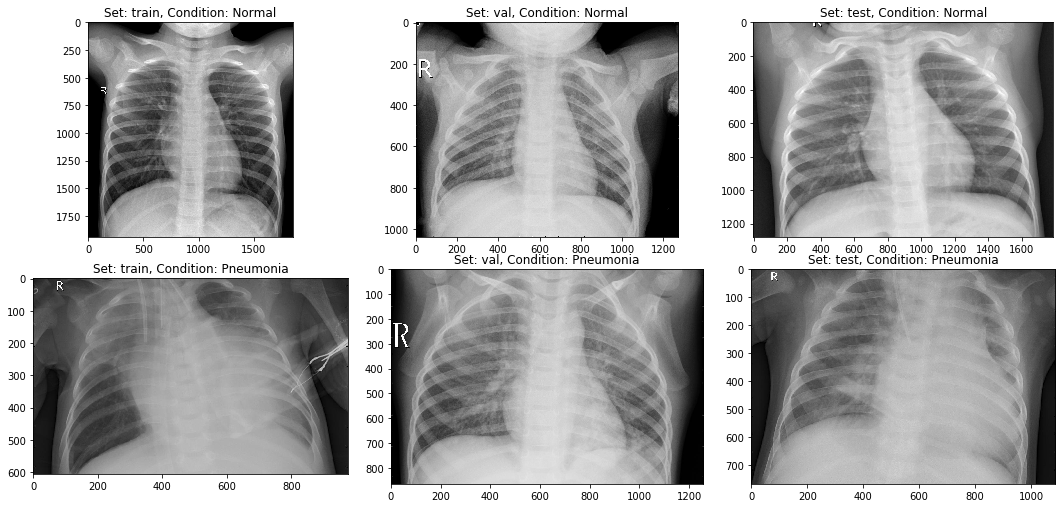

In [6]:
input_path = 'chest-xray-pneumonia/chest_xray/chest_xray/'
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(2, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['train', 'val', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/NORMAL/'+os.listdir(set_path+'/NORMAL')[0]), cmap='gray')
    ax[i].set_title('Set: {}, Condition: Normal'.format(_set))
    ax[i+3].imshow(plt.imread(set_path+'/PNEUMONIA/'+os.listdir(set_path+'/PNEUMONIA')[0]), cmap='gray')
    ax[i+3].set_title('Set: {}, Condition: Pneumonia'.format(_set))

In [7]:
TRAIN_DIR = "chest-xray-pneumonia/chest_xray/chest_xray/train/"
TEST_DIR = "chest-xray-pneumonia/chest_xray/chest_xray/test/"

In [8]:
def get_label(Dir):
    for nextdir in os.listdir(Dir):
        if not nextdir.startswith('.'):
            if nextdir in ['NORMAL']:
                label = 0
            elif nextdir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
    return nextdir, label

### Preprocessing

In [9]:
def preprocessing_data(Dir):
    X = []
    y = []
    
    for nextdir in os.listdir(Dir):
        nextdir, label = get_label(Dir)
        temp = Dir + nextdir
        
        for image_filename in tqdm(os.listdir(temp)):
            path = os.path.join(temp + '/', image_filename)
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = skimage.transform.resize(img, (150, 150, 3))
                img = np.asarray(img)
                X.append(img)
                y.append(label)
    
    X = np.asarray(X)
    y = np.asarray(y)
    
    return X, y

In [10]:
def get_data(Dir):
    X = []
    y = []
    
    for nextDir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            if nextDir in ['NORMAL']:
                label = 0
            elif nextDir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
                
            temp = Dir + nextDir
            
            for file in tqdm(os.listdir(temp)):
                img = cv2.imread(temp + '/' + file)
                if img is not None:
                    img = skimage.transform.resize(img, (150, 150, 3))
                    img = np.asarray(img)
                    X.append(img)
                    y.append(label)
    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [11]:
X_train, y_train = get_data(TRAIN_DIR)
X_test, y_test = get_data(TEST_DIR)

100%|██████████| 234/234 [05:19<00:00,  5.01s/it]


In [12]:
print(X_train.shape,'\n',X_test.shape)

(5216, 150, 150, 3) 
 (624, 150, 150, 3)


In [13]:
print(y_train.shape,'\n',y_test.shape)

(5216,) 
 (624,)


In [14]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)


Using TensorFlow backend.
/home/mzamora/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mzamora/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mzamora/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mzamora/anaconda3/lib/python3.7/site-packages/t

In [16]:
Pimages = os.listdir(TRAIN_DIR + "PNEUMONIA")
Nimages = os.listdir(TEST_DIR + "NORMAL")

## Plotting the XRays Images

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------


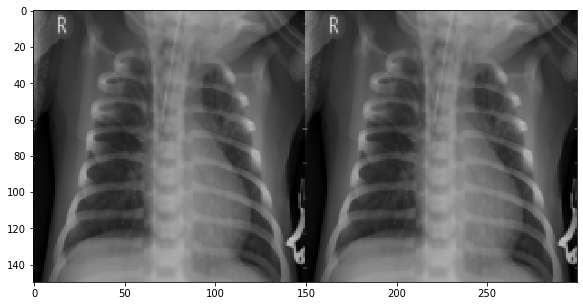

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------


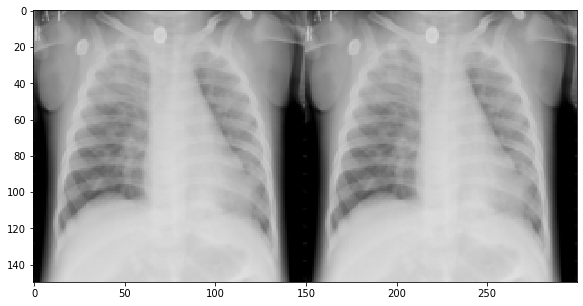

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------


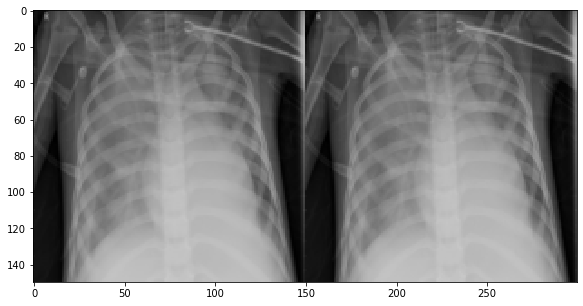

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------


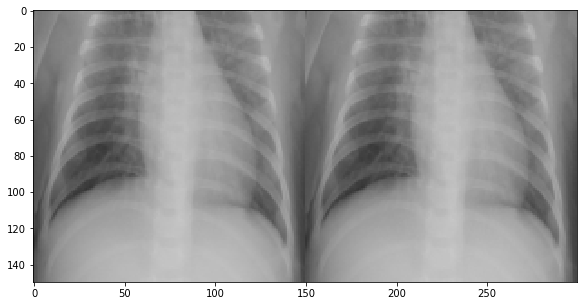

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------


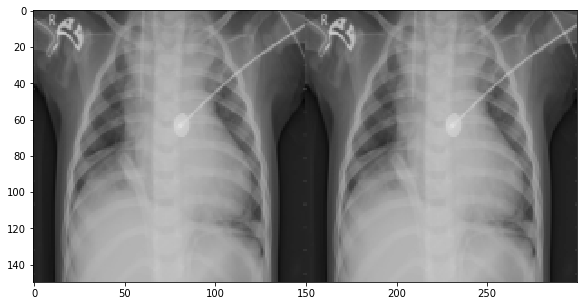

In [25]:
import matplotlib.pyplot as plt
def plotter(i):
    imagep1 = cv2.imread(TRAIN_DIR+"PNEUMONIA/"+Pimages[i])
    imagep1 = skimage.transform.resize(imagep1, (150, 150, 3) , mode = 'reflect')
    imagen1 = cv2.imread(TRAIN_DIR+"NORMAL/"+Nimages[i])
    imagen1 = skimage.transform.resize(imagep1, (150, 150, 3))
    pair = np.concatenate((imagen1, imagep1), axis=1)
    print("(Left) - No Pneumonia Vs (Right) - Pneumonia")
    print("-----------------------------------------------------------------------------------------------------")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(5,10):
    plotter(i)

  Save the best models after checkpoint in hdf5 format

In [17]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint, LearningRateScheduler
lr_reduce = ReduceLROnPlateau(monitor='val_acc' , factor=0.1, epsilon=0.0001, patience=1, verbose=1)

/home/mzamora/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:1335: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [18]:
from keras.callbacks import ModelCheckpoint
filepath = "transferlearning_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [19]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation
from keras.layers import Dropout, GlobalAveragePooling2D
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , RMSprop , Adadelta , Adam
from keras.layers import Conv2D, BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.image_data_format()
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [20]:
X_train=X_train.reshape(5216, 150, 150, 3)
X_test=X_test.reshape(624, 150, 150, 3)

Importing InceptionV3 from Keras but with no weights

In [21]:
from keras.applications.inception_v3 import InceptionV3
# create the base pre-trained model
base_model = InceptionV3(weights=None, include_top=False , input_shape=(150, 150, 3))

Instructions for updating:
Colocations handled automatically by placer.


**The output of the above model was being fed into the after layers that we are laying down. There is no rule of thumb for laying down the after layers after InceptionV3 but practice and intuition. **

**The layers were checked multiple times for the output and finally the second last layer of BatchNormalization() did some good for the model. **

In [22]:
x = base_model.output
x = Dropout(0.5)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
predictions = Dense(2, activation='sigmoid')(x)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Train the whole network

In [23]:
base_model.load_weights("input/weights/inception_v3_weights.h5")

In [24]:
model = Model(inputs=base_model.input, outputs=predictions)

In [25]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [26]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [27]:
batch_size = 64
epochs = 10

In [28]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test) , callbacks=[lr_reduce,checkpoint] , epochs=epochs)

Instructions for updating:
Use tf.cast instead.
Train on 5216 samples, validate on 624 samples
Epoch 1/10
5216/5216 [==============================] - 1848s 354ms/step - loss: 0.1896 - acc: 0.9189 - val_loss: 0.6903 - val_acc: 0.8494

Epoch 00001: val_acc improved from -inf to 0.84936, saving model to transferlearning_weights.hdf5
Epoch 2/10
5216/5216 [==============================] - 1636s 314ms/step - loss: 0.0993 - acc: 0.9724 - val_loss: 0.3488 - val_acc: 0.9022

Epoch 00002: val_acc improved from 0.84936 to 0.90224, saving model to transferlearning_weights.hdf5
Epoch 3/10
5216/5216 [==============================] - 1520s 291ms/step - loss: 0.0680 - acc: 0.9764 - val_loss: 0.7054 - val_acc: 0.7885

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00003: val_acc did not improve from 0.90224
Epoch 4/10
5216/5216 [==============================] - 1482s 284ms/step - loss: 0.0307 - acc: 0.9891 - val_loss: 0.9528 - val_acc: 0.7532

Epoch 00004: R

In [59]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [29]:
model.load_weights("transferlearning_weights.hdf5")

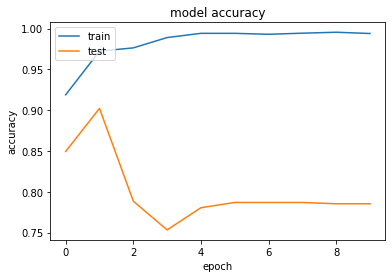

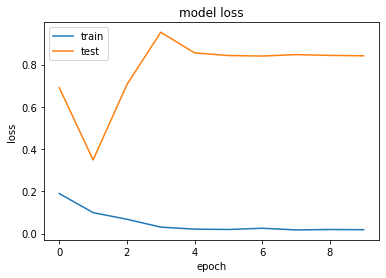

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

Confusion matrix is very much necessary for the above model because we are having unequal number of people with pneumonia and no pneumonia. In the above dataset we are having more people suffering from pneumonia than normal people. So, as I told in other notebook , accuracy won't be the soul criteria for determining model performance.

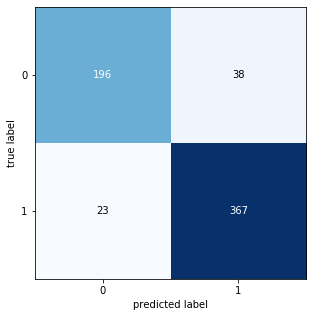

In [32]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM, figsize=(5,5))
plt.show()